## Optimize evaluation parameters for custom model

Predicting with Cellpose is not trivial.  Still need to consider parameters such as ```diameter```, ```bsize```, ```niter```, ```channels```, ```cellprob_threshold```, and ```flow_threshold```


In [13]:
import napari
viewer = napari.Viewer()

from cellpose import models, io
import os
import numpy as np
from skimage.io import imread
from tnia.plotting.plt_helper import imshow_multi2d, random_label_cmap
from matplotlib import pyplot as plt
from tnia.deeplearning.dl_helper import quantile_normalization, get_label_paths

In [14]:
parent_path =r'D:\images\tnia-python-images\\imagesc\\2024_12_19_sem_grain_size_revisit'
#parent_path =r'/home/bnorthan/images/tnia-python-images/imagesc/2024_12_19_sem_grain_size_revisit'
model_path = os.path.join(parent_path, 'models')
model_name = 'cellpose_grains_fill_holes'

model_finetuned = models.CellposeModel(gpu=True, model_type=None, pretrained_model= os.path.join(model_path, model_name))
model_cpsam = models.CellposeModel(gpu=True)

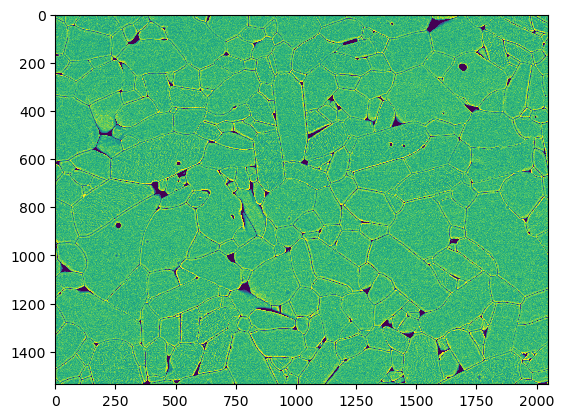

In [15]:
im_name = '211122_AM_Al2O3_SE_021.ome.tiff'
#im_name = '211122_AM_Al2O3_SE_027_sp.tif'
#im_name = r'Zeiss-Pub/Zeiss-Pub.png'
im = imread(os.path.join(parent_path, im_name))
im = quantile_normalization(im, channels=True)
plt.imshow(im)

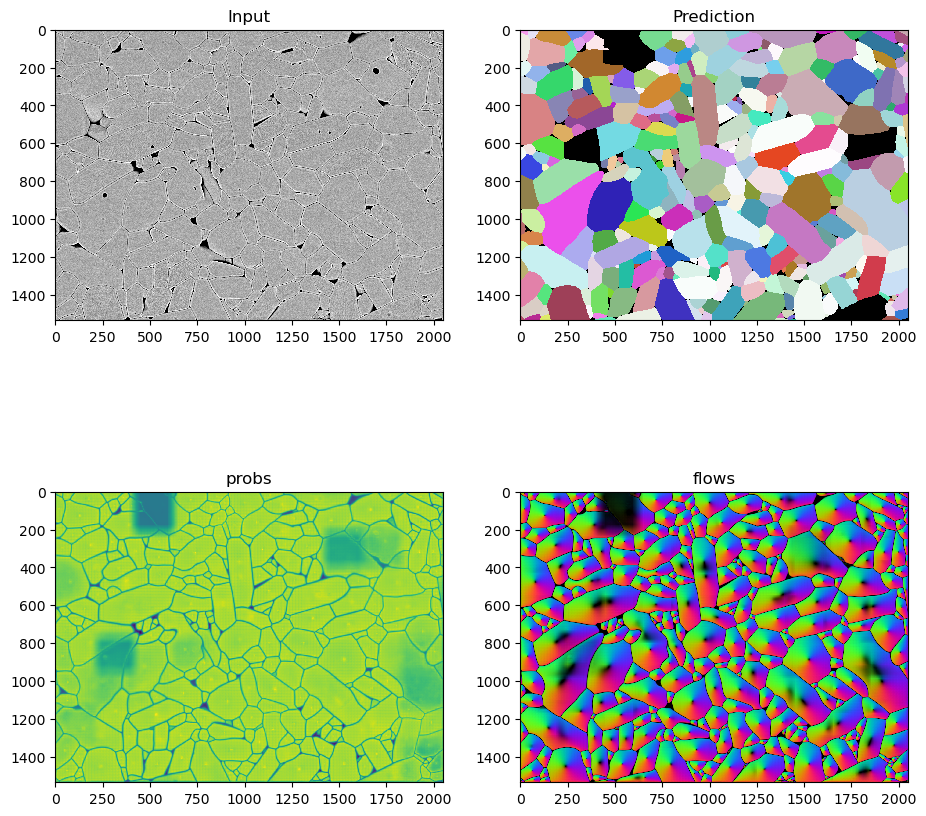

In [17]:
#masks= model.eval(im, diameter=30, bsize=512, niter=2000, channels=[0,0], cellprob_threshold=-1.0, flow_threshold=4)
masks= model_cpsam.eval(im, diameter=30, niter=2000)
masks_60 = model_cpsam.eval(im, diameter=60)

colormaps = ['gray', random_label_cmap(), 'viridis', 'gray']
fig = imshow_multi2d([im, masks[0], masks[1][2], masks[1][0]], ['Input', 'Prediction', 'probs', 'flows'], 2, 2, colormaps=colormaps, width=11, height=11)

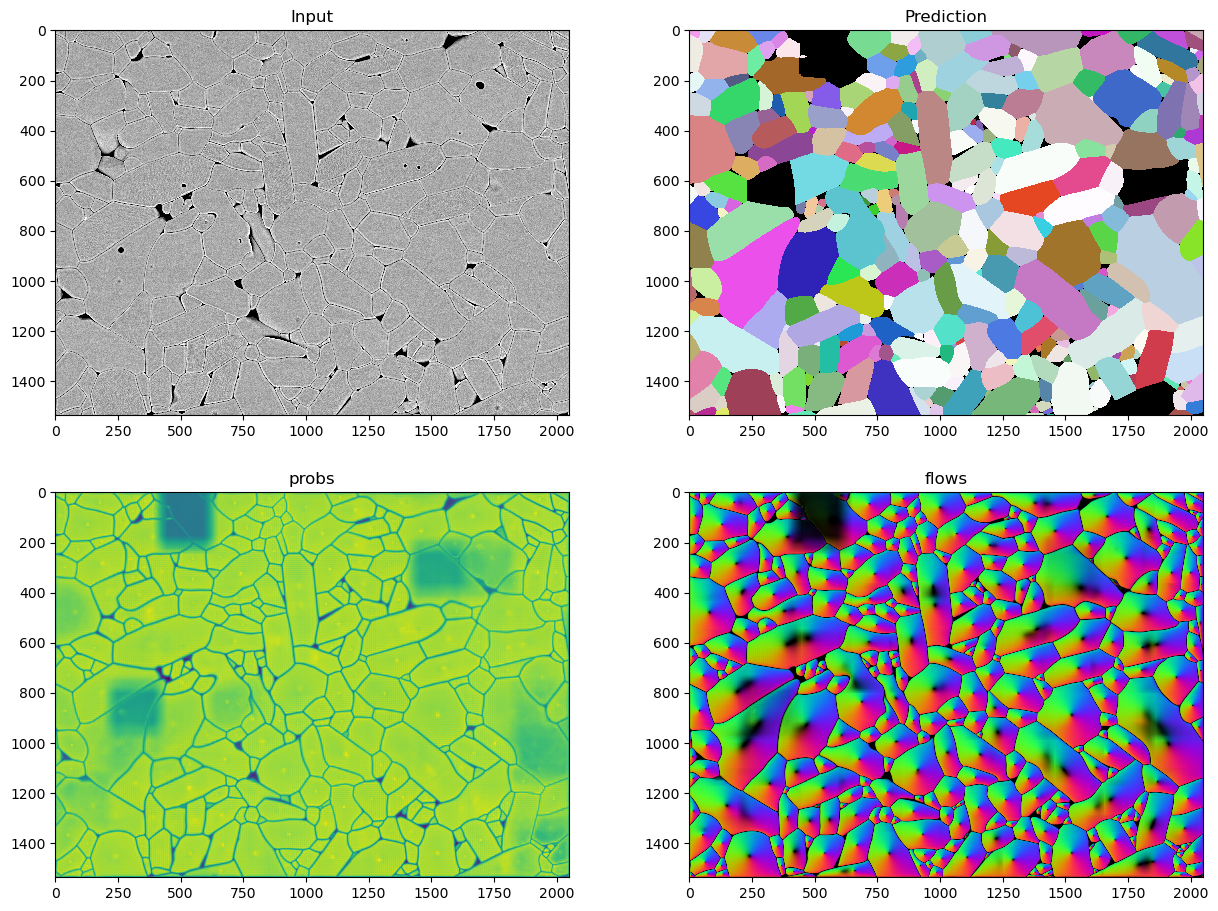

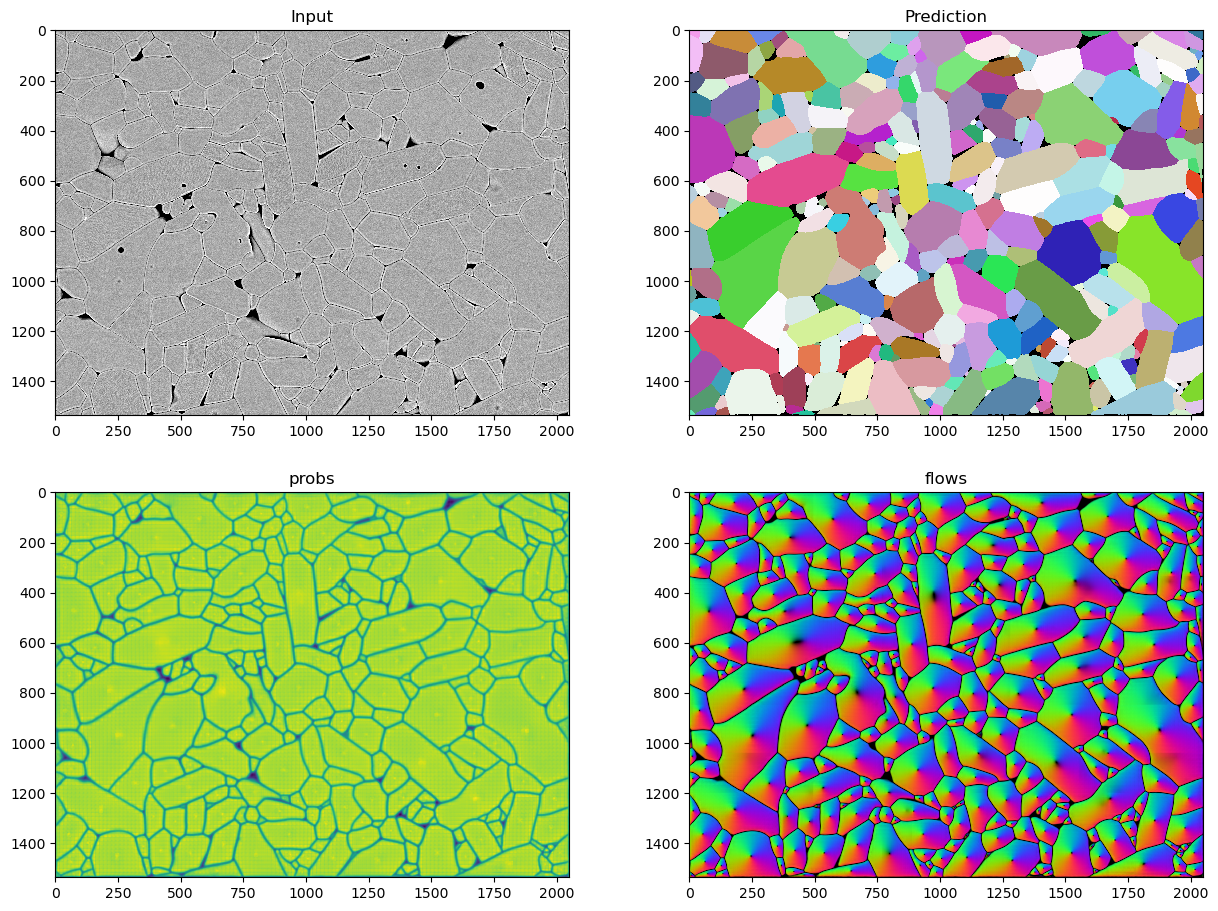

In [19]:

fig = imshow_multi2d([im, masks[0], masks[1][2], masks[1][0]], ['Input', 'Prediction', 'probs', 'flows'], 2, 2, colormaps=colormaps, width=15, height=11)
fig = imshow_multi2d([im, masks_60[0], masks_60[1][2], masks_60[1][0]], ['Input', 'Prediction', 'probs', 'flows'], 2, 2, colormaps=colormaps, width=15, height=11)

In [13]:
from skimage.io import imsave
imsave(os.path.join(parent_path, "custom_SE_27.tif"), masks[0])

C:\Users\bnort\AppData\Local\Temp\ipykernel_3612\332070099.py:2: UserWarning: D:\images\tnia-python-images\\imagesc\\2024_12_19_sem_grain_size_revisit\custom_SE_27.tif is a low contrast image
  imsave(os.path.join(parent_path, "custom_SE_27.tif"), masks[0])


In [5]:
viewer.add_image(im, name='image')
viewer.add_labels(masks[0], name='predicted labels')
viewer.add_image(masks[1][2], name='probs')
viewer.add_image(masks[1][0], name='flows')

<Image layer 'flows' at 0x78e3e18f00e0>

In [10]:
viewer = napari.Viewer()

crop_sizes = [1024, 2048]

viewer.add_image(im[:1024,:1024], name='image')

for crop_size in crop_sizes:
    print(f'Processing {crop_size}x{crop_size} crops')

    im_crop = im[0:crop_size, 0:crop_size]
    masks_crop = model_cpsam.eval(im_crop, diameter=30, niter=2000, channels=[0,0], cellprob_threshold=-1.0, flow_threshold=4)
    masks_crop = masks_crop[0][:1024, :1024]
    viewer.add_labels(masks_crop, name=f'predicted labels {crop_size}x{crop_size}')
    

channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Processing 1024x1024 crops


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


Processing 2048x2048 crops


In [12]:
viewer = napari.Viewer()

masks_cpsam = model_cpsam.eval(im, diameter=30, niter=2000, channels=[0,0], cellprob_threshold=-1.0)[0]
masks_cpsam_60 = model_cpsam.eval(im, diameter=60, niter=2000, channels=[0,0], cellprob_threshold=-1.0)[0]

#masks_finetuned = model_finetuned.eval(im, diameter=30, niter=2000, channels=[0,0], cellprob_threshold=-1.0)[0]

viewer.add_image(im, name='image')
viewer.add_labels(masks_cpsam, name='predicted labels cpsam')
viewer.add_labels(masks_cpsam_60, name='predicted labels finetuned')


channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used
channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used


<Labels layer 'predicted labels finetuned' at 0x1bd8edc6190>

In [20]:
viewer.add_image(masks[1][2], name='probs')

<Image layer 'probs' at 0x1bd8095a610>